In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

## cyber data cleaning

In [26]:
# load dataset
#cyber = pd.read_csv('CyberAttacks.csv')
#cyber = cyber.replace('?', np.nan)
#cyber['date'] = pd.to_datetime(cyber['date'], dayfirst=True)

#cyber['target_code'] = cyber.target_class.str[0]
#cyber["target_class"] = cyber.target_class.str[1:]
#cyber = cyber.set_index('date')
cyber['year'] = cyber.index.year
cyber['month'] = cyber.index.month


#pd.set_option('display.max_columns', cyber.shape[1])
#cyber.shape

#cyber['country'].replace(regex=True, inplace=True, to_replace=('>1'), value='Multiple')
#cyber.target_class.astype('str')
cyber['target_class'].replace(inplace=True, regex=True, to_replace=('Accommodation and food service activities'), value=('Hospitality'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Activities of extraterritorial organizations and bodies'), value=('NGO activities'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Administrative and support service activities'), value=('Human Resources'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Arts entertainment and recreation'), value=('Arts and Entertainment'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Electricity gas steam and air conditioning supply'), value=('Utilities provider'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Financial and insurance activities'), value=('Finances'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Human health and social work activities'), value=('Healthcare'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Information and communication'), value=('IT'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Multiple Targets'), value=('Multiple targets'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Professional scientific and technical activities'), value=('Sciences'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Public administration and defence; compulsory social security'), value=('Government'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Public administration and defence, compulsory social security'), value=('Government'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Transportation and storage'), value=('Transportation'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Water supply, sewerage waste management, and remediation activities'), value=('Water supply'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Wholesale and retail trade; repair of motor vehicles and motorcycles'), value=('Wholesale and retail trade'))

cyber.to_csv('cyber_cleaned')

## Individual: WordCloud

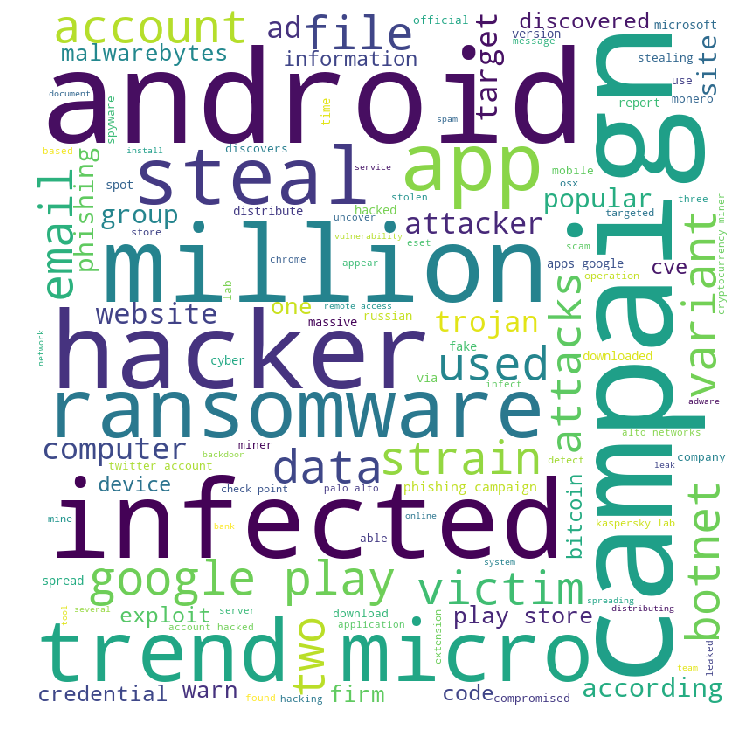

In [48]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None

cyber_individual = cyber[cyber['target_code'] == 'X']
cyber_individual['description'] = cyber_individual['description'].str.lower()

new_stopwords=STOPWORDS.union(set(['malware','researchers', 'new', 'user','users','discover',\
                                   'called','attack','malicious','dubbed','security','reveal','detail'\
                                  'details','detail','details','reveals','victim','using','targeting']))
wordcloud = WordCloud(width = 800, height = 800,
              background_color ='white',
                stopwords = new_stopwords,
                min_font_size = 10).generate(' '.join(cyber_individual['description']))


plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('wordcloud.png')

## attacks by targets 2017 vs 2018

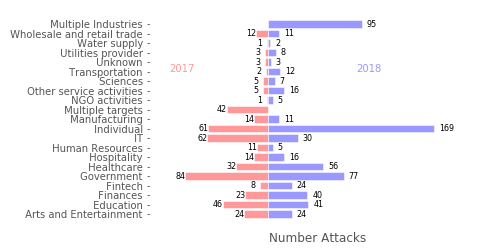

In [34]:
# 2017 plot
cyber2017_target = cyber['01/01/2017':'06/30/2017'].groupby("target_class")['attack'].count()
cyber2017_target = pd.DataFrame(cyber2017_target)
cyber2017_target.columns = ["attacks_2017"]
cyber2017_target.reset_index()
X1 = cyber2017_target.reset_index()['target_class']
Y1 = np.array(cyber2017_target['attacks_2017'].astype(int))
plt.barh(X1, -Y1, facecolor='#ff9999', edgecolor='white', color='white')

# 2018 plot
cyber2018_target = cyber['01/01/2018':'06/30/2018'].groupby("target_class")['attack'].count()
cyber2018_target = pd.DataFrame(cyber2018_target)
cyber2018_target.columns = ["attacks_2018"]
cyber2018_target.reset_index()
X2 = cyber2018_target.reset_index()['target_class']
Y2 = np.array(cyber2018_target['attacks_2018'].astype(int))
plt.barh(X2, +Y2, facecolor='#9999ff', edgecolor='white', color='white')

#combined

ax = plt.gca()
ax.set_facecolor('white')

for x,y in zip(Y2,X2):
    plt.text(x+5, y, '%s' % str(x), ha='left', va= 'center', fontsize=8)

for x,y in zip(Y1,X1):
    plt.text(-x-10, y, '%s' % str(x), ha='left', va= 'center', fontsize=8)
    
plt.xlim(-120,+220)
plt.xticks([])

plt.xlabel('Number Attacks')

plt.text(90,15,'2018',color='#9999ff',size=10)
plt.text(-100,15,'2017',color='#ff9999',size=10)

plt.savefig('targets_2017_2018.png')

## number of attacks 2017 vs 2018 

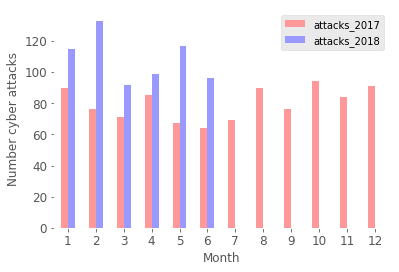

In [40]:
cyber2017 = cyber['01/01/2017':'12/31/2017'].groupby("month")['attack'].count()
cyber2017 = pd.DataFrame(cyber2017)
cyber2017.columns = ["attacks_2017"]


cyber2018 = cyber['01/01/2018':'07/31/2018'].groupby('month')['attack'].count()
cyber2018 = pd.DataFrame(cyber2018)
cyber2018.columns = ['attacks_2018']

cyber_2017_2018 = pd.concat([cyber2017, cyber2018],axis = 1, join = 'outer')

cyber_2017_2018.plot.bar(color = ['#ff9999','#9999ff'], rot = 0, fontsize=12).set_facecolor('white')
plt.xlabel('Month')
plt.ylabel('Number cyber attacks')

plt.savefig('attacks_2017_2018.png')

## causes individual attack

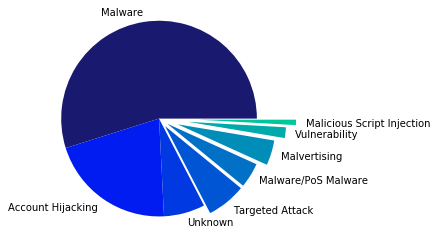

In [47]:
cyber2 = cyber.reset_index()
cyber2['target_class']  = cyber2.target_class.astype('str')
cyber2.loc[cyber2.target_code == 'X'].groupby('attack')['target_code'].count().sort_values(ascending = False)
cyber3 = cyber2.loc[cyber2.target_code == 'X'].groupby('attack').filter(lambda x: x.shape[0] > 2)

colors = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8','#00AAAA','#00C69C']
explode = (0, 0, 0,0.1,0.1,0.2,0.3,0.4)
cyber3.groupby('attack')['target_code'].count().sort_values(ascending = False).plot(kind='pie', colors=colors, explode=explode)
plt.ylabel('')
plt.axis('equal')
plt.savefig('individuals_pie.jpg')